In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pyproj import Geod
%matplotlib inline

In [40]:
##Data ingestion step
df=pd.read_csv('finalTrain.csv')

In [41]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [43]:
##handling null values
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [44]:
null_col=[features for features in df.columns if df[features].isnull().sum()>0]
null_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weather_conditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

In [45]:
categorical_null_columns=[]
numerical_null_columns=[]
for i in null_col:
    
    if df[i].dtypes=='O':
        categorical_null_columns.append(i)
    else:
        numerical_null_columns.append(i)
print('cat columns :',categorical_null_columns,'\n','num columns :',numerical_null_columns)


cat columns : ['Time_Orderd', 'Weather_conditions', 'Road_traffic_density', 'Festival', 'City'] 
 num columns : ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']


In [46]:
##numerical columns filled with median
df['Delivery_person_Age']=df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median())
df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median())
df['multiple_deliveries']=df['multiple_deliveries'].fillna(df['multiple_deliveries'].median())
##caterical columns filled with mode
df['Time_Orderd']=df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0])
df['Weather_conditions']=df['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0])
df['Road_traffic_density']=df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0])
df['Festival']=df['Festival'].fillna(df['Festival'].mode()[0])
df['City']=df['City'].fillna(df['City'].mode()[0])


In [47]:
df["Delivery_person_Age"]=df["Delivery_person_Age"].astype(int)
df["Delivery_person_Ratings"]=df["Delivery_person_Ratings"].astype(float)
df["multiple_deliveries"]=df["multiple_deliveries"].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          45584 non-null  int32  
 3   Delivery_person_Ratings      45584 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  45584 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           45584 non-null  object 
 12  Road_traffic_density         45584 non-null  object 
 13  Vehicle_conditio

In [49]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [50]:
##finding duplicate records
df.duplicated().sum()

0

In [51]:
##droping id columns
df=df.drop(labels=['ID','Delivery_person_ID'],axis=1)

In [52]:

wgs84_geod= Geod(ellps='WGS84')

In [53]:
def distance(lat1,lon1,lat2,lon2):
    x,y,dist=wgs84_geod.inv(lon1,lat1,lon2,lat2)
    return dist

In [54]:
lat1=df["Restaurant_latitude"].tolist()
lon1=df["Restaurant_longitude"].tolist()
lat2=df["Delivery_location_latitude"].tolist()
lon2=df["Delivery_location_longitude"].tolist()

In [55]:
df["Distance (meter)"]=distance(lat1,lon1,lat2,lon2)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (meter)
0,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,10271.464023
1,21,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,6229.376077
2,23,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21,13764.305930
3,34,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,2927.794728
4,24,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,19373.484089


In [56]:
##droping latitude and longitude columns , Type_of_order
df.drop(labels=['Type_of_order','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude',"Order_Date"],axis=1,inplace=True)

In [57]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (meter)
0,36,4.2,21:55,22:10,Fog,Jam,2,motorcycle,3,No,Metropolitian,46,10271.464023
1,21,4.7,14:55,15:05,Stormy,High,1,motorcycle,1,No,Metropolitian,23,6229.376077
2,23,4.7,17:30,17:40,Sandstorms,Medium,1,scooter,1,No,Metropolitian,21,13764.305930
3,34,4.3,09:20,09:30,Sandstorms,Low,0,motorcycle,0,No,Metropolitian,20,2927.794728
4,24,4.7,19:50,20:05,Fog,Jam,1,scooter,1,No,Metropolitian,41,19373.484089


In [58]:
df["Order_Hour"]=df.Time_Orderd.str.split(':').str[0]
df["Order_Min"]=df.Time_Orderd.str.split(':').str[1]
df["Picked_Hour"]=df.Time_Order_picked.str.split(':').str[0]
df["Picked_Min"]=df.Time_Order_picked.str.split(':').str[1]

In [59]:
df.drop(labels=["Time_Order_picked","Time_Orderd"],axis=1,inplace=True)

In [60]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Distance (meter),Order_Hour,Order_Min,Picked_Hour,Picked_Min
0,36,4.2,Fog,Jam,2,motorcycle,3,No,Metropolitian,46,10271.464023,21,55,22,10
1,21,4.7,Stormy,High,1,motorcycle,1,No,Metropolitian,23,6229.376077,14,55,15,05
2,23,4.7,Sandstorms,Medium,1,scooter,1,No,Metropolitian,21,13764.305930,17,30,17,40
3,34,4.3,Sandstorms,Low,0,motorcycle,0,No,Metropolitian,20,2927.794728,09,20,09,30
4,24,4.7,Fog,Jam,1,scooter,1,No,Metropolitian,41,19373.484089,19,50,20,05


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45584 non-null  int32  
 1   Delivery_person_Ratings  45584 non-null  float64
 2   Weather_conditions       45584 non-null  object 
 3   Road_traffic_density     45584 non-null  object 
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_vehicle          45584 non-null  object 
 6   multiple_deliveries      45584 non-null  int32  
 7   Festival                 45584 non-null  object 
 8   City                     45584 non-null  object 
 9   Time_taken (min)         45584 non-null  int64  
 10  Distance (meter)         45584 non-null  float64
 11  Order_Hour               45584 non-null  object 
 12  Order_Min                41516 non-null  object 
 13  Picked_Hour              45584 non-null  object 
 14  Picked_Min            

In [62]:

df["Order_Hour"]=df["Order_Hour"].astype(float)
df["Order_Min"]=df["Order_Min"].astype(float)
df["Picked_Hour"]=df["Picked_Hour"].astype(float)
df["Picked_Min"]=df["Picked_Min"].astype(float)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45584 non-null  int32  
 1   Delivery_person_Ratings  45584 non-null  float64
 2   Weather_conditions       45584 non-null  object 
 3   Road_traffic_density     45584 non-null  object 
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_vehicle          45584 non-null  object 
 6   multiple_deliveries      45584 non-null  int32  
 7   Festival                 45584 non-null  object 
 8   City                     45584 non-null  object 
 9   Time_taken (min)         45584 non-null  int64  
 10  Distance (meter)         45584 non-null  float64
 11  Order_Hour               45584 non-null  float64
 12  Order_Min                41516 non-null  float64
 13  Picked_Hour              45584 non-null  float64
 14  Picked_Min            

In [64]:
#Segregating numerical and categorical features
numerical_features=df.columns[df.dtypes!='O']
categorical_features=df.columns[df.dtypes=='O']
print("NUMERICAL FEATURES : ",numerical_features)
print("CATEGORICAL FEATURES : ",categorical_features)

NUMERICAL FEATURES :  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Distance (meter)',
       'Order_Hour', 'Order_Min', 'Picked_Hour', 'Picked_Min'],
      dtype='object')
CATEGORICAL FEATURES :  Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')


In [65]:
df[categorical_features].describe()

,Weather_conditions,Road_traffic_density,Type_of_vehicle,Festival,City
count,45584,45584,45584,45584,45584
unique,6,4,4,2,3
top,Fog,Low,motorcycle,No,Metropolitian
freq,8269,16077,26429,44688,35287


In [66]:
for i in df[categorical_features]:
    print(f'value counts of : {df[i].value_counts()}\n')

value counts of : Fog           8269
Stormy        7584
Cloudy        7533
Sandstorms    7494
Windy         7422
Sunny         7282
Name: Weather_conditions, dtype: int64

value counts of : Low       16077
Jam       14139
Medium    10945
High       4423
Name: Road_traffic_density, dtype: int64

value counts of : motorcycle          26429
scooter             15273
electric_scooter     3814
bicycle                68
Name: Type_of_vehicle, dtype: int64

value counts of : No     44688
Yes      896
Name: Festival, dtype: int64

value counts of : Metropolitian    35287
Urban            10133
Semi-Urban         164
Name: City, dtype: int64



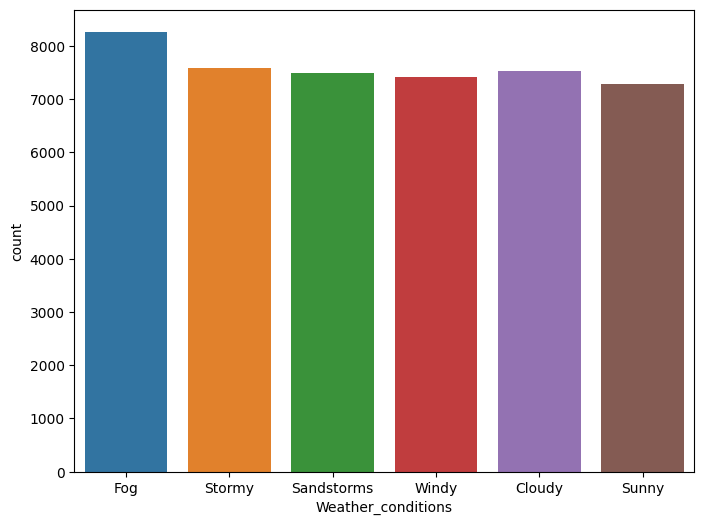

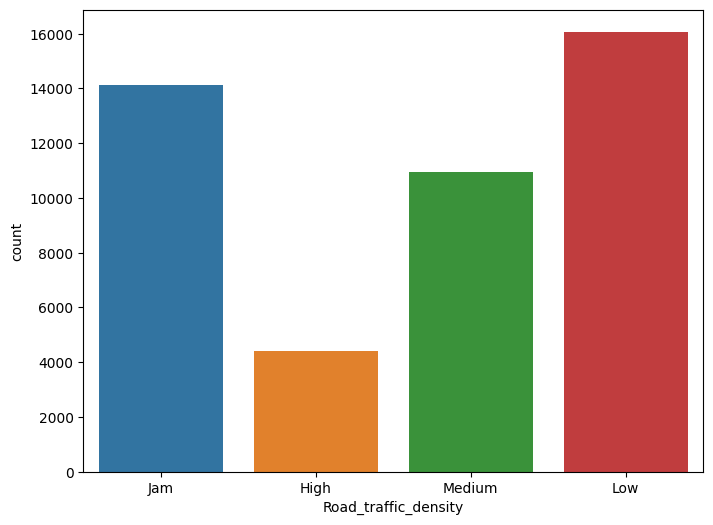

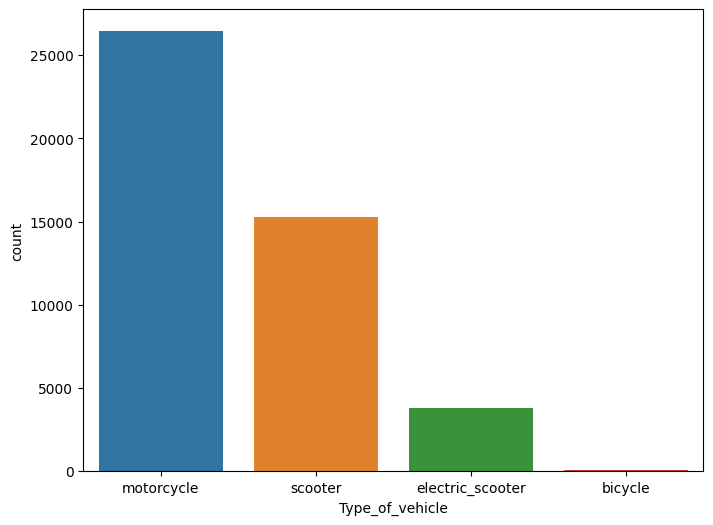

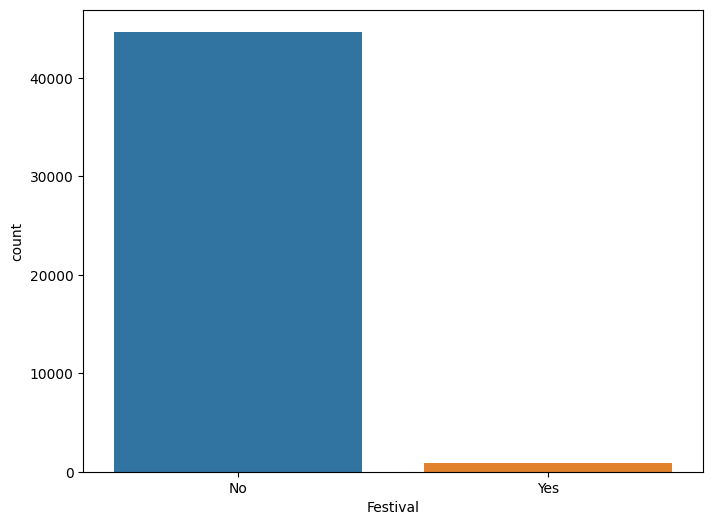

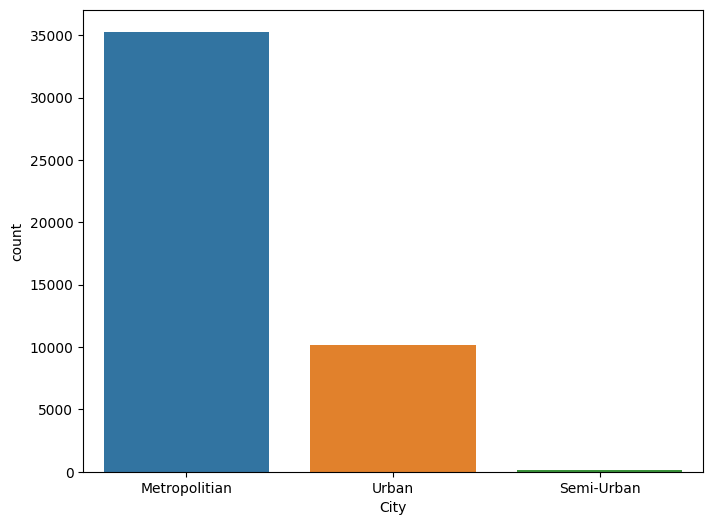

In [67]:
for i in df[categorical_features]:
    plt.figure(figsize=(8,6))
    ax=sns.countplot(x=i,data=df)
    plt.xlabel=(i)
    plt.ylabel=('count')
    plt.show()
    

In [68]:
"""plt.figure(figsize=(12,12))
x=0
for i in df[numerical_features]:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()"""

"plt.figure(figsize=(12,12))\nx=0\nfor i in df[numerical_features]:\n    sns.histplot(data=df,x=i,kde=True)\n    print('\n')\n    plt.show()"

In [69]:
#sns.pairplot(df)

<AxesSubplot:>

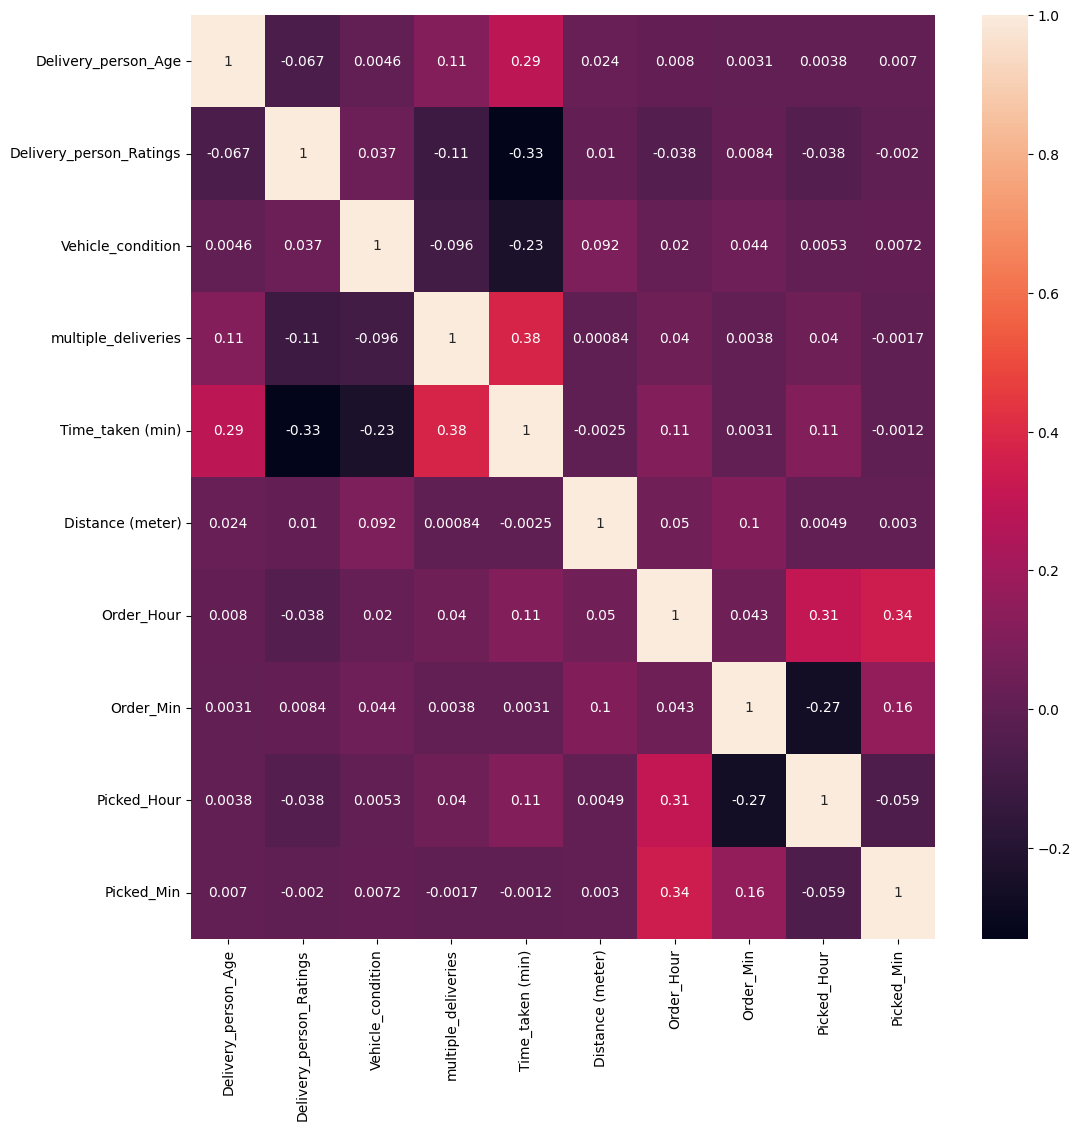

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [72]:
##unique values of all categorical features
for i in df[categorical_features]:
    print(f'{i} column unique values : {df[i].unique()}\n')

Weather_conditions column unique values : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']

Road_traffic_density column unique values : ['Jam' 'High' 'Medium' 'Low']

Type_of_vehicle column unique values : ['motorcycle' 'scooter' 'electric_scooter' 'bicycle']

Festival column unique values : ['No' 'Yes']

City column unique values : ['Metropolitian' 'Urban' 'Semi-Urban']



In [73]:
#replacing odinal categorical values
Weather_conditions_map={'Stormy':6,'Sandstorms':5,'Windy':4,'Fog':3,'Cloudy':2,'Sunny':1}
Road_traffic_density_map={'Jam':4,'High':3,'Medium':2,'Low':1}
Type_of_vehicle_map={'motorcycle':4,'scooter':3,'electric_scooter':2,'bicycle':1}
Festival_map={'No':0,'Yes':1}
City_map={'Metropolitian':3,'Urban':2,'Semi-Urban':1}


In [74]:
df['Weather_conditions']=df['Weather_conditions'].map(Weather_conditions_map)
df['Road_traffic_density']=df['Road_traffic_density'].map(Road_traffic_density_map)
df['Type_of_vehicle']=df['Type_of_vehicle'].map(Type_of_vehicle_map)
df['Festival']=df['Festival'].map(Festival_map)
df['City']=df['City'].map(City_map)


In [75]:
df['Time_Taken (min)']=df['Time_taken (min)']
df.drop('Time_taken (min)',axis=1,inplace=True)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Distance (meter),Order_Hour,Order_Min,Picked_Hour,Picked_Min,Time_Taken (min)
0,36,4.2,3,4,2,4,3,0,3,10271.464023,21.0,55.0,22.0,10.0,46
1,21,4.7,6,3,1,4,1,0,3,6229.376077,14.0,55.0,15.0,5.0,23
2,23,4.7,5,2,1,3,1,0,3,13764.305930,17.0,30.0,17.0,40.0,21
3,34,4.3,5,1,0,4,0,0,3,2927.794728,9.0,20.0,9.0,30.0,20
4,24,4.7,3,4,1,3,1,0,3,19373.484089,19.0,50.0,20.0,5.0,41


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      45584 non-null  int32  
 1   Delivery_person_Ratings  45584 non-null  float64
 2   Weather_conditions       45584 non-null  int64  
 3   Road_traffic_density     45584 non-null  int64  
 4   Vehicle_condition        45584 non-null  int64  
 5   Type_of_vehicle          45584 non-null  int64  
 6   multiple_deliveries      45584 non-null  int32  
 7   Festival                 45584 non-null  int64  
 8   City                     45584 non-null  int64  
 9   Distance (meter)         45584 non-null  float64
 10  Order_Hour               45584 non-null  float64
 11  Order_Min                41516 non-null  float64
 12  Picked_Hour              45584 non-null  float64
 13  Picked_Min               41457 non-null  float64
 14  Time_Taken (min)      

In [80]:
df["Vehicle_condition"].unique()










array([2, 1, 0, 3], dtype=int64)